<a href="https://colab.research.google.com/github/MJMortensonWarwick/AAMA/blob/main/2_2_network_centrality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Centrality Measures in a network
For this tutorial we will demonstrate how to implement centrality measures (as discussed in class) in NetworkX. For convenience, we will use the in-built dataset "Zachary’s Karate Club".

Let's import the graph to our session:

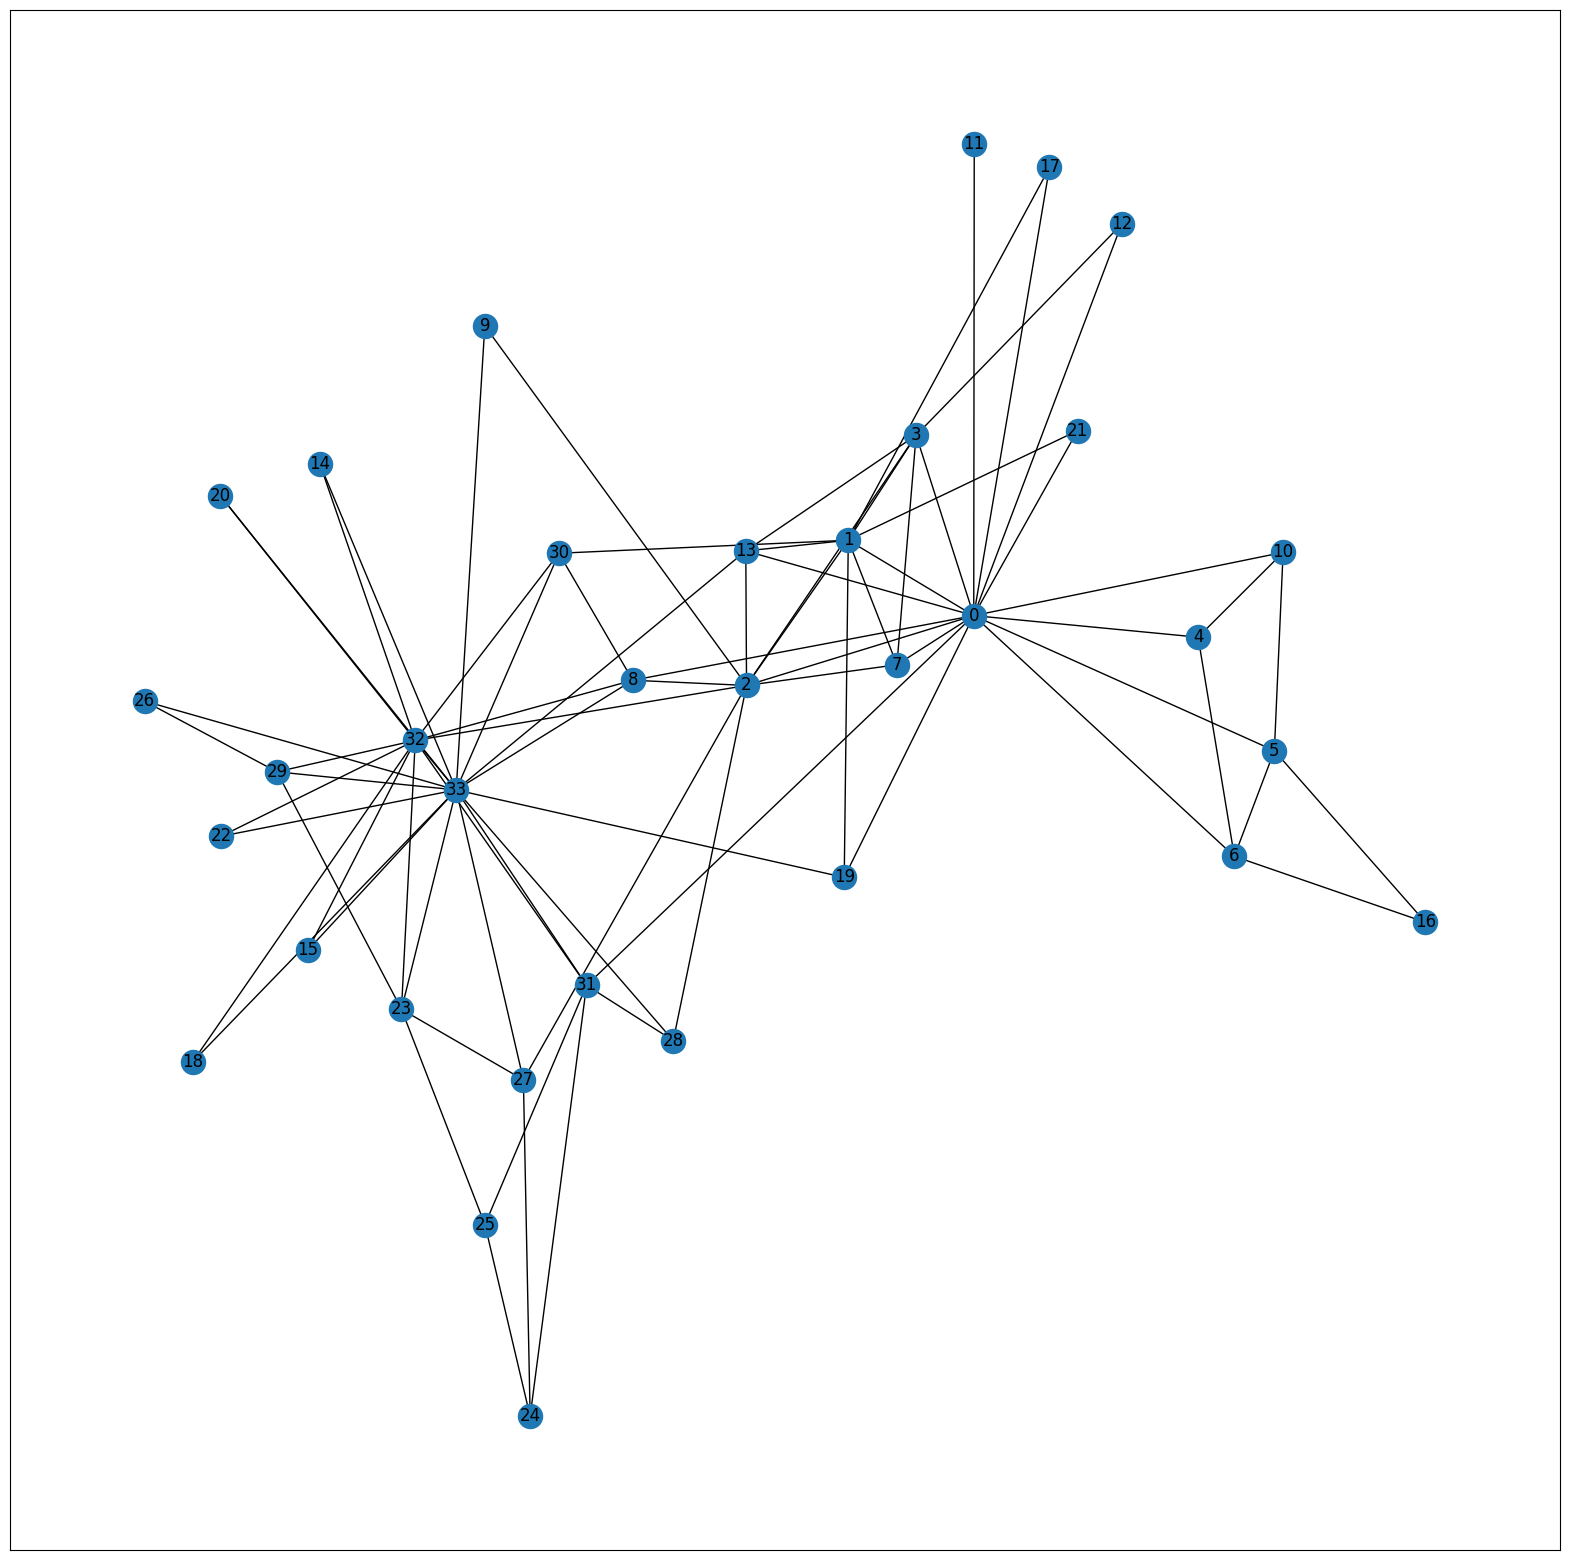

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# define the graph
g = nx.karate_club_graph()

# plot the graph
plt.figure(figsize=(20, 20))
nx.draw_networkx(g, with_labels = True)

As we can see it is an undirected graph with 33 nodes and lots of edges! But which nodes are the most central?

## Degree Centrality
As the easiest(!), let's start with degree centrality (where the higher the number of direct contacts (adjacencies) is the more central the node). The formula (as per the slides) is:
<br>
$d_y = \Sigma \frac{y,x}{N-1} $
<br>
And in Python its something like this ...

In [3]:
deg_centrality = nx.degree_centrality(g) # g is our graph

# print the centrality
print(deg_centrality)

{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}


So we get the results but its a bit hard to read as its in order of the keys (the node ID). Let's build a little function to help:

In [8]:
import numpy as np

def dict_sorter(unsorted_dict, n):
  ''' function to sort a dictionary by items
      input: a dictionary and the number of values to return
      returns: the top n results in descending sort order
  '''

  keys = list(unsorted_dict.keys())
  values = list(unsorted_dict.values())
  sorted_value_index = np.argsort(values)[::-1][:n]
  sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

  return sorted_dict

print(dict_sorter(deg_centrality, 5)) # print the top 5

{33: 0.5151515151515151, 0: 0.48484848484848486, 32: 0.36363636363636365, 2: 0.30303030303030304, 1: 0.2727272727272727}


So 33 wins (connected to more than 50% of the network), then 0 and so on.

## Betweenness Centrality
We'll do the same for betweenness - the number of times our node is on the shortest path between two other nodes. The formula is:
<br>
$ g_y = \Sigma \frac{\sigma st(y)}{\sigma st}$
<br>
And in code (again using our helper function:

In [10]:
# Normalise the results as per the above formula
between_centrality = nx.betweenness_centrality(g, normalized = True, endpoints = False)

print(dict_sorter(between_centrality, 5)) # print the top 5

{0: 0.43763528138528146, 33: 0.30407497594997596, 32: 0.145247113997114, 2: 0.14365680615680618, 31: 0.13827561327561325}


Again 0 and 33 doing well!

## Closeness Centrality
Now time for closeness - how many steps is it to each other node in the network. Normalised the formula is:
<br>
$ C_y = \frac{N-1}{\Sigma_y d(y,x)} $
<br>
And as code ...

In [11]:
 close_centrality = nx.closeness_centrality(g)

 print(dict_sorter(close_centrality, 5)) # print the top 5

{0: 0.5689655172413793, 2: 0.559322033898305, 33: 0.55, 31: 0.5409836065573771, 13: 0.515625}


So 0 again the highest - this time 33 has dropped off.

## Eiganvector Centrality
Last but not least!

In [12]:
eig_centrality = nx.eigenvector_centrality(g)

print(dict_sorter(eig_centrality, 5)) # print the top 5

{33: 0.37337121301323506, 0: 0.35548349418519426, 2: 0.3171893899684447, 32: 0.3086510477336959, 1: 0.2659538704545024}


And this time 33 is the highest and 0 is second. Let's call 0 the winner! 🏆